In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm

with open('attention_vis_with_time.pickle', 'rb') as handle:
    atten_vis = pickle.load(handle)

In [23]:
np.min([atten_vis[i]['query_rel_time'] for i in range(len(atten_vis))])

314

In [3]:
atten_vis_1 = []
atten_vis_2 = []
atten_vis_3 = []
for i in range(len(atten_vis)):
    if atten_vis[i]['query_rel_time'] < 339:
        atten_vis_1.append(atten_vis[i])
    elif atten_vis[i]['query_rel_time'] >= 339:
            atten_vis_2.append(atten_vis[i])
    # elif atten_vis[i]['query_rel_time'] >= 330 and atten_vis[i]['query_rel_time'] < 347:
    #     atten_vis_2.append(atten_vis[i])
    # elif atten_vis[i]['query_rel_time'] >= 347:
    #     atten_vis_3.append(atten_vis[i])
# atten_vis = atten_vis_1

In [24]:
def get_rel_score(atten_vis):
    query_set = set()
    target_set = set()
    select_query = []
    for idx in tqdm(range(len(atten_vis))):
        query_rel = atten_vis[idx]['query_rel']
        if query_rel in query_set:
            continue
        selected_index = (np.array(atten_vis[idx]['3layer']['attention_score']).reshape(-1) > 0.5)
        if np.sum(selected_index) <= 10:
            continue
        selected_rels= np.array(atten_vis[idx]['3layer']['rel'])[selected_index]
        print(atten_vis[idx]['query_rel_time'])
        # plt.plot(np.array(atten_vis[idx]['3layer']['attention_score']).reshape(-1))
        query_set.add(query_rel)
        target_set.update(selected_rels)
        select_query.append(idx)
    return query_set, target_set, select_query
query_rel_1, target_rel_2, select_query_3 = get_rel_score(atten_vis_1)
query_rel_2, target_rel_2, select_query_3 = get_rel_score(atten_vis_2)
query_rel_3, target_rel_3, select_query_3 = get_rel_score(atten_vis_3)

  0%|          | 0/62 [00:00<?, ?it/s]

 27%|██▋       | 17/62 [00:00<00:00, 150.60it/s]

314
314
326
315
335
327
327
329
327
323
321
328
323
336
315
315
337
324
324
326
314
327


100%|██████████| 62/62 [00:00<00:00, 158.26it/s]


336
327
315
335
329
331
316
330
335
314
317
320
336
337
335
327
331
319
324
323
314
334
328


  0%|          | 0/39 [00:00<?, ?it/s]

363
342
341
362


 67%|██████▋   | 26/39 [00:00<00:00, 125.63it/s]

348
342
356
341
343
359
362
344
350
352
344
355
344
344
339
344
350
341
347
342
355
351
352


100%|██████████| 39/39 [00:00<00:00, 123.77it/s]


352
357
345
348
342
342
352
342
345


0it [00:00, ?it/s]


In [27]:
# set intersection
shared_rel = query_rel_1.intersection(query_rel_2)
def get_common_rel(atten_vis, shared_rel):
    visited_rel = set()
    target_set = set()
    select_query = []
    for idx in tqdm(range(len(atten_vis))):
        query_rel = atten_vis[idx]['query_rel']
        if not (query_rel in shared_rel and query_rel not in visited_rel):
            continue
        # print('ok')
        visited_rel.add(query_rel)
        selected_index = (np.array(atten_vis[idx]['3layer']['attention_score']).reshape(-1) > 0.2)
        if np.sum(selected_index) <= 3:
            continue
        selected_rels= np.array(atten_vis[idx]['3layer']['rel'])[selected_index]
        print(query_rel, atten_vis[idx]['query_rel_time'])
        # plt.plot(np.array(atten_vis[idx]['3layer']['attention_score']).reshape(-1))
        target_set.update(selected_rels)
        select_query.append(idx)
    return target_set, select_query

target_set_rel1, select_query1 = get_common_rel(atten_vis_1, shared_rel)
target_set_rel2, select_query2 = get_common_rel(atten_vis_2, shared_rel)
# print(len(target))

100%|██████████| 62/62 [00:00<00:00, 516.26it/s]


18 315
95 329
49 324
85 326
128 315
29 329
982 330
23 331
50 319
36 334


  0%|          | 0/39 [00:00<?, ?it/s]

95 363
982 342
18 356
23 362
36 350
128 344
85 348
50 342


100%|██████████| 39/39 [00:00<00:00, 320.64it/s]

29 357
49 342


In [28]:
shared_rel

{18, 23, 29, 36, 49, 50, 85, 95, 128, 982}

In [6]:
target_rel_set = target_set_rel1.intersection(target_set_rel2)

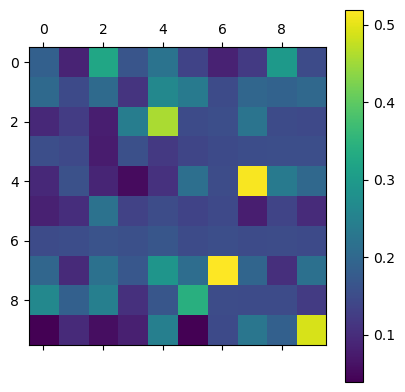

In [7]:
import random
select_query_rel = list(shared_rel)
# random_select = random.sample(list(target_set), 47)
random_select = list(target_rel_set)[20:30]
target_max_rel = np.max(random_select)
target_rel_to_idx = np.zeros(target_max_rel + 1, dtype=np.int32)
target_rel_to_idx[random_select] = np.arange(10)

def first_in_array(source, target):
    visitied = set()
    selected_index = []
    exist_target_rel = []
    for idx, item in enumerate(source):
        if item in target and item not in visitied:
            visitied.add(item)
            selected_index.append(idx)
            exist_target_rel.append(item)
    return selected_index, exist_target_rel

vis_mat = []

for idx in select_query1:
    # get the target rel
    masks, exist_target_rel = first_in_array(atten_vis_1[idx]['3layer']['rel'], random_select)
    # print(masks)
    # print(len(exist_target_rel))
    masks_value = np.array(atten_vis_1[idx]['3layer']['attention_score']).reshape(-1)[masks]
    # print(masks_value.shape)
    row_value = np.zeros(10)
    # print(target_rel_to_idx[exist_target_rel].shape)
    row_value[target_rel_to_idx[exist_target_rel]] = masks_value
    vis_mat.append(row_value)
plt.matshow(np.array(vis_mat))
plt.colorbar()

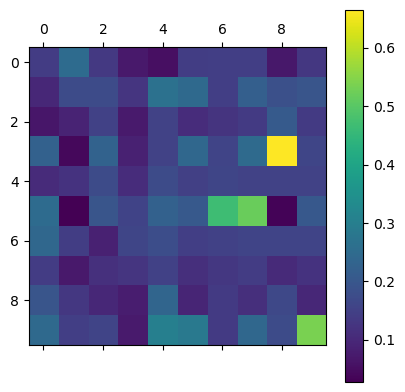

In [8]:
import random
select_query_rel = list(shared_rel)
# random_select = random.sample(list(target_set), 47)
random_select = list(target_rel_set)[20:30]
target_max_rel = np.max(random_select)
target_rel_to_idx = np.zeros(target_max_rel + 1, dtype=np.int32)
target_rel_to_idx[random_select] = np.arange(10)

def first_in_array(source, target):
    visitied = set()
    selected_index = []
    exist_target_rel = []
    for idx, item in enumerate(source):
        if item in target and item not in visitied:
            visitied.add(item)
            selected_index.append(idx)
            exist_target_rel.append(item)
    return selected_index, exist_target_rel

vis_mat2 = []

for idx in select_query2:
    # get the target rel
    masks, exist_target_rel = first_in_array(atten_vis_2[idx]['3layer']['rel'], random_select)
    # print(masks)
    # print(len(exist_target_rel))
    masks_value = np.array(atten_vis_2[idx]['3layer']['attention_score']).reshape(-1)[masks]
    # print(masks_value.shape)
    row_value = np.zeros(10)
    # print(target_rel_to_idx[exist_target_rel].shape)
    row_value[target_rel_to_idx[exist_target_rel]] = masks_value
    vis_mat2.append(row_value)
plt.matshow(np.array(vis_mat2))
plt.colorbar()

In [9]:
len(select_query1)

10

In [10]:


with open('id2relation.pickle', 'rb') as handle:
    id2relation = pickle.load(handle)

In [30]:
for rel_id in list(target_rel_set)[20:30]: 
    print(id2relation[rel_id], rel_id)

Appeal for diplomatic cooperation (such as policy support) 20
Receive deployment of peacekeepers 21
Express intent to engage in diplomatic cooperation (such as policy support) 22
Express intent to settle dispute 23
Praise or endorse 24
Demand 25
Obstruct passage, block 26
Abduct, hijack, or take hostage 27
Engage in symbolic act 28
fight with small arms and light weapons 29


In [31]:
from datetime import datetime, timedelta
A = [315, 331, 329, 334, 324, 319, 326, 326, 329, 315, 330]
B = [356, 362, 357, 350, 342, 342, 348, 363, 344, 344, 342]
for idx, rel_id in enumerate(select_query_rel): 
    print(rel_id)
    if rel_id == 982:
        print('idd')
    else:
        print(id2relation[rel_id], (datetime(2014, 1, 1) + timedelta(days=A[idx])).strftime('%Y-%m-%d'))
        print(id2relation[rel_id], (datetime(2014, 1, 1) + timedelta(days=B[idx])).strftime('%Y-%m-%d'))

128
Yield 2014-11-12
Yield 2014-12-23
36
Accuse 2014-11-28
Accuse 2014-12-29
49
Defend verbally 2014-11-26
Defend verbally 2014-12-24
18
Consult 2014-12-01
Consult 2014-12-17
50
Conduct strike or boycott 2014-11-21
Conduct strike or boycott 2014-12-09
85
Appeal for target to allow international involvement (non-mediation) 2014-11-16
Appeal for target to allow international involvement (non-mediation) 2014-12-09
982
idd
23
Express intent to settle dispute 2014-11-23
Express intent to settle dispute 2014-12-30
29
fight with small arms and light weapons 2014-11-26
fight with small arms and light weapons 2014-12-11
95
Accuse of crime, corruption 2014-11-12
Accuse of crime, corruption 2014-12-11


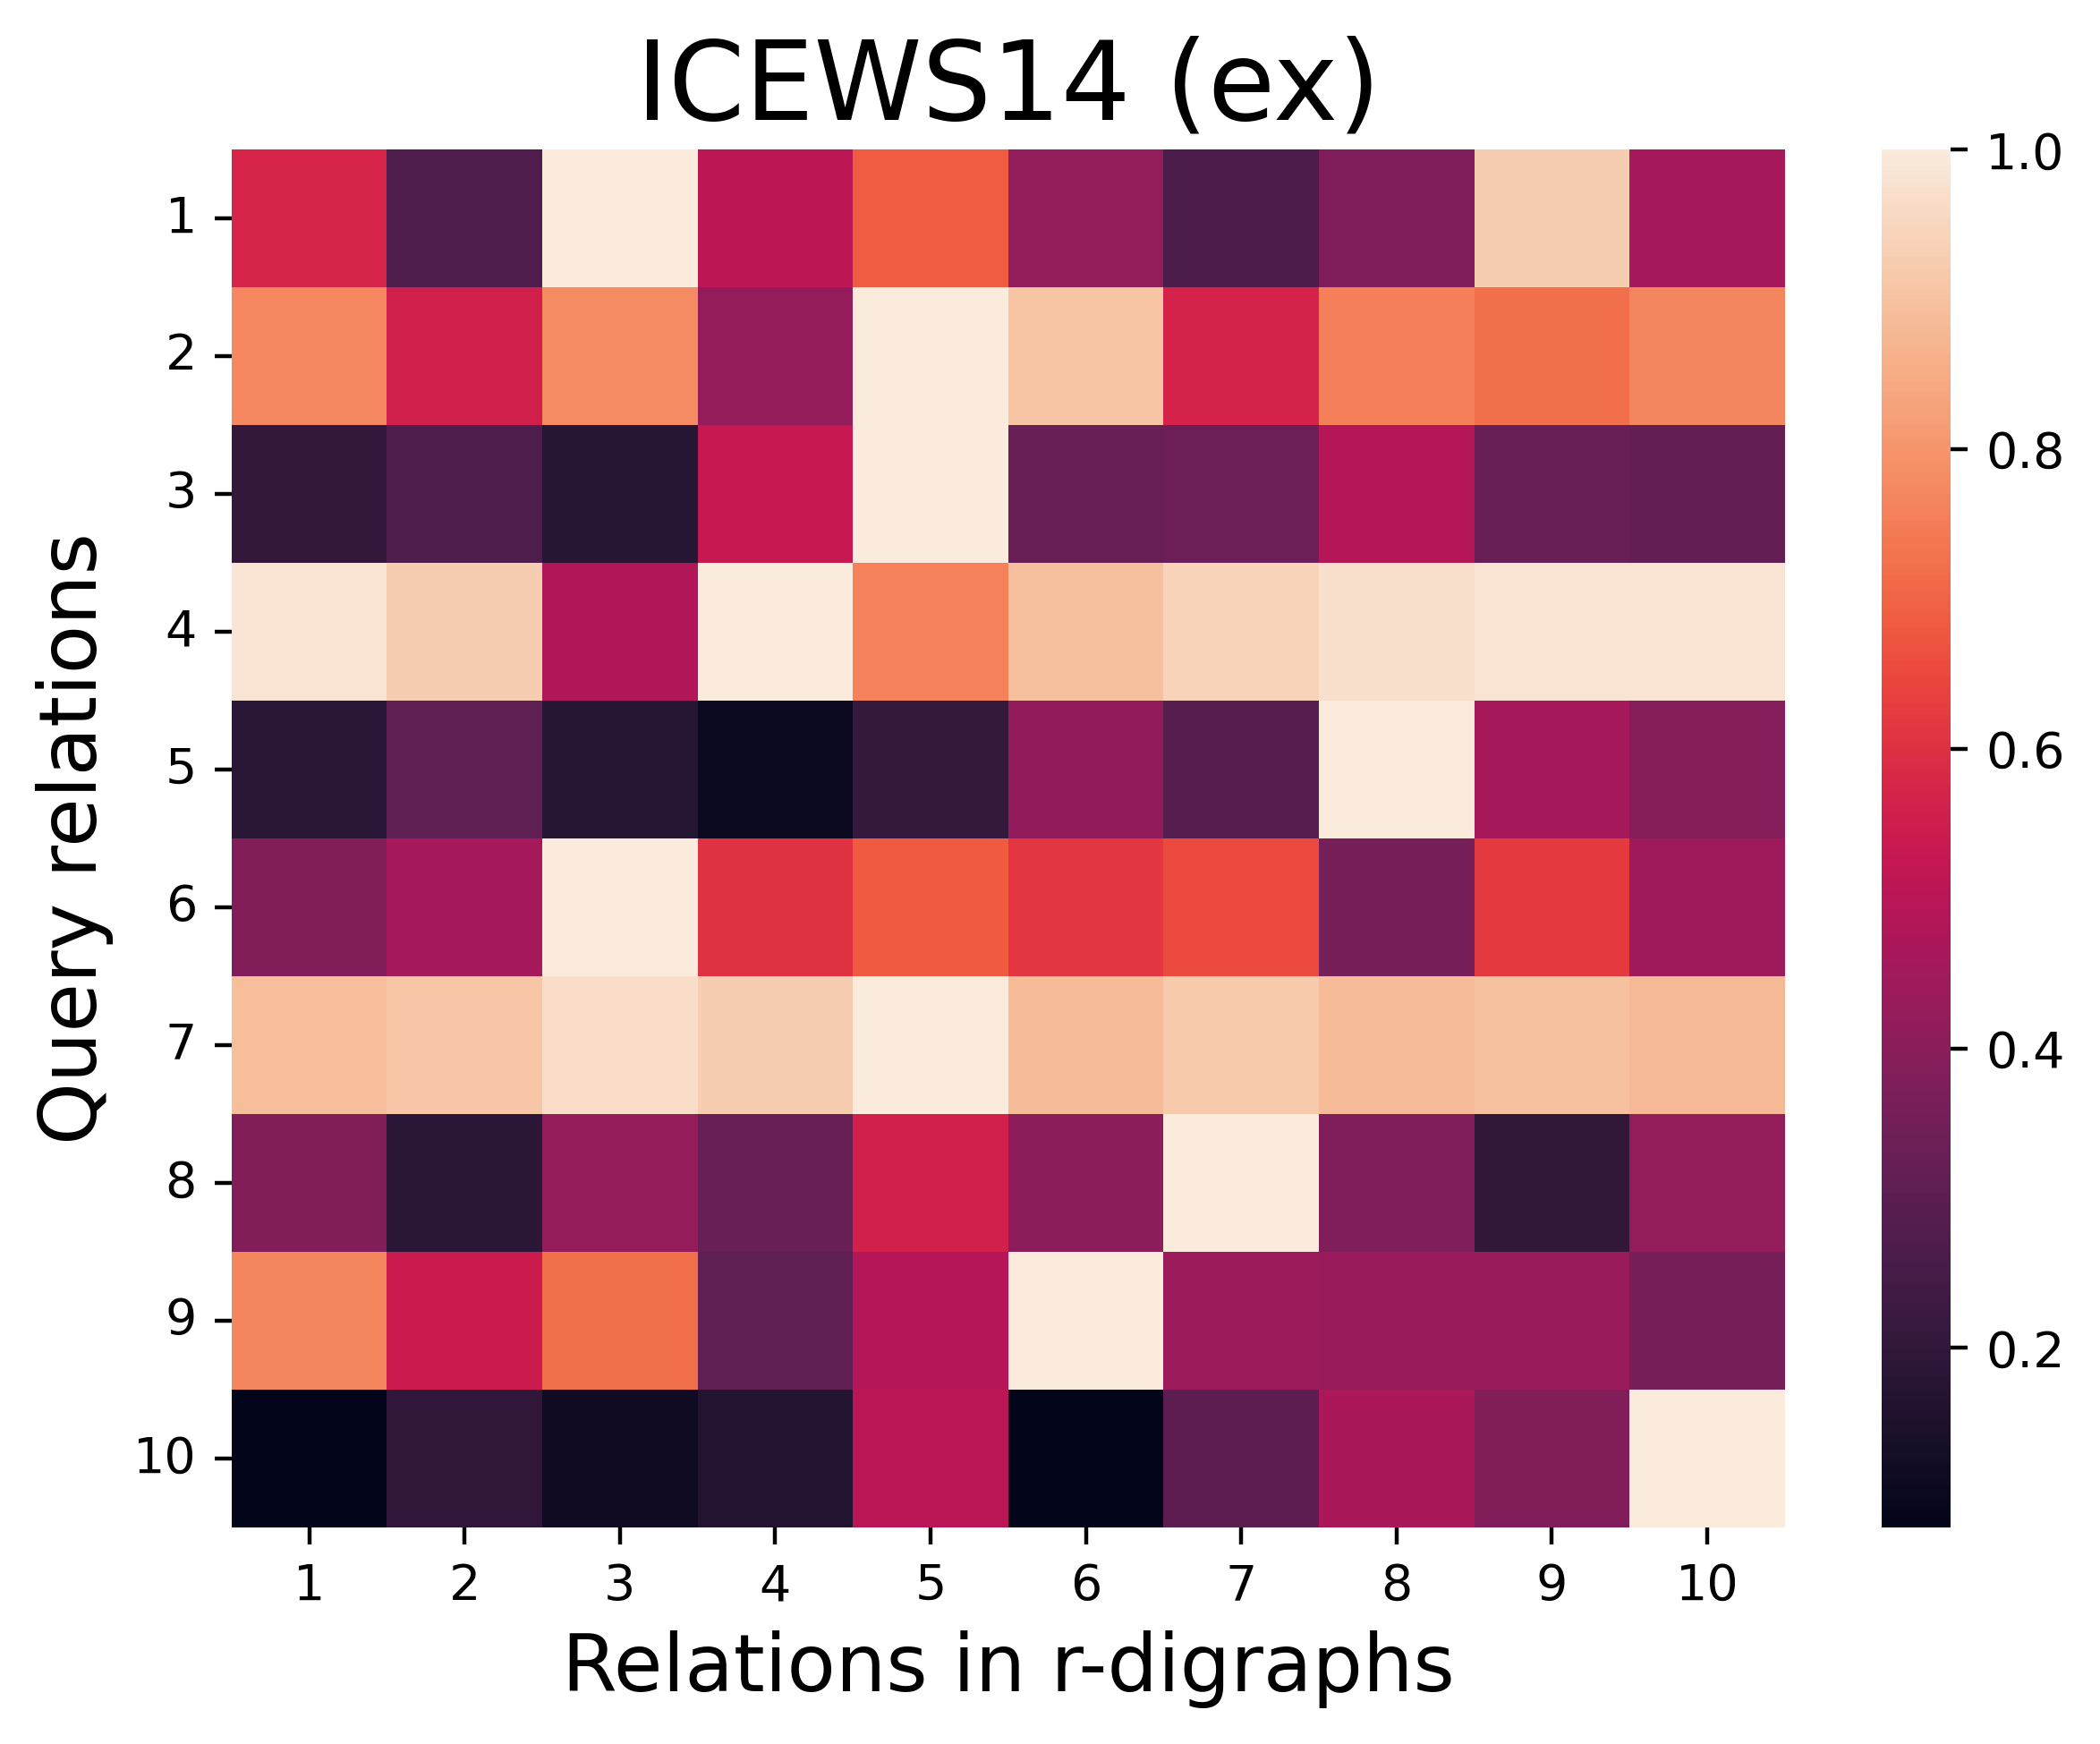

In [21]:
from matplotlib.font_manager import FontProperties
import seaborn as sns

font = FontProperties('sans')
font.set_size(10)
font_axis = {'family' : 'sans',
'weight' : 'light',
'size'  : 16,
}

font_axis2 = {'family' : 'Times New Roman',
'weight' : 'light',
'size'  : 22,
}

fig =plt.figure(dpi=400, figsize=(7,5))
vis_mat_array = np.array(vis_mat)
sns.heatmap(vis_mat_array/np.max(vis_mat_array, axis=1, keepdims=True))

x_pos = np.arange(0, 10, 1) + 0.5
y_pos = np.arange(0, 10, 1) + 0.5

labels = np.arange(1, 11, 1) + 0

plt.xticks(x_pos, labels, rotation=0, fontproperties=font)
plt.yticks(y_pos, labels, rotation=0, fontproperties=font)

plt.xlabel('Relations in r-digraphs',font_axis)
plt.ylabel('Query relations',font_axis)
plt.title('ICEWS14 (ex)', font_axis2)
plt.savefig("ICEWS14 (ex)t1.pdf", bbox_inches='tight', pad_inches=0.02)
plt.show()

In [82]:
np.array(vis_mat)[36, 9]

0.9075226783752441

In [83]:
print(id2relation[select_query_rel[36]])
print(id2relation[random_select[9]])

Reversed Sign formal agreement
Make statement


NameError: name 'id2relation' is not defined